In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import random
import math

In [3]:
%matplotlib inline

## Bagging

In [5]:
data = sklearn.datasets.load_diabetes(return_X_y=False)

In [6]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
print (data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [10]:
X = pd.DataFrame(data.data)
X.head()

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [11]:
X.columns = data.feature_names

In [12]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [13]:
y = data.target

## Step0: Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

## Step1: Lets create a single decision tree

In [15]:
tree = DecisionTreeRegressor(max_depth=7, min_samples_leaf=3)

In [17]:
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [18]:
y_pred = tree.predict(X_test)

In [19]:
%matplotlib notebook

<IPython.core.display.Javascript object>


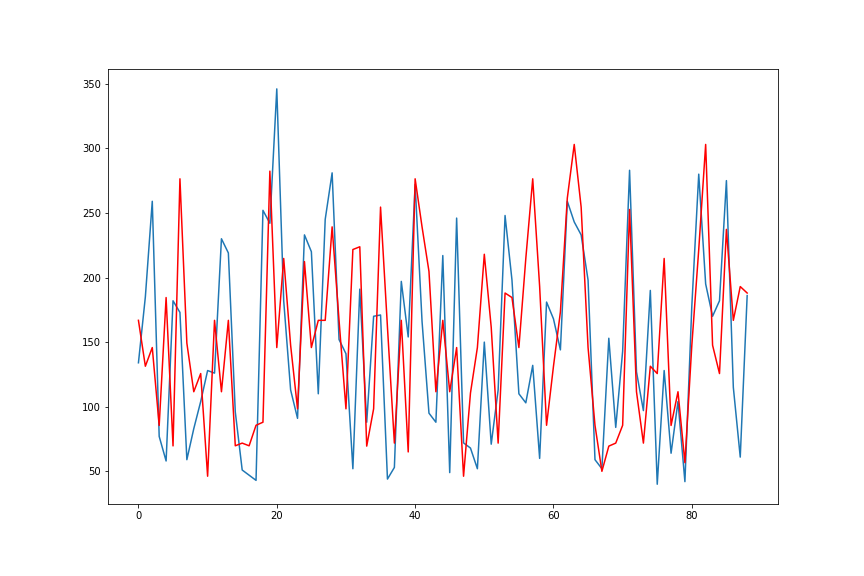

In [21]:
plt.figure(figsize=(12,8))
plt.plot(y_test)
plt.plot(y_pred, c='r')

In [22]:
test_rmse_for_single_model = np.sqrt(mean_squared_error(y_test, y_pred))

In [23]:
test_rmse_for_single_model

71.65742261989593

In [24]:
test_r2_score_single_model = r2_score(y_test, y_pred)

In [25]:
test_r2_score_single_model

0.06485933240798536

## Step2: Lets do Bagging(combine multiple trees with random sampling of data(Random Forest)

In [26]:
features = list(X.columns)

In [28]:
features

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [29]:
for i in range(10):
    print(random.sample(features, 3))

['sex', 'bmi', 's4']
['s4', 's6', 'age']
['bmi', 'sex', 'bp']
['s3', 's6', 's1']
['s2', 's1', 's5']
['bp', 's1', 's6']
['s5', 's1', 's2']
['s6', 'bp', 'bmi']
['s6', 'bp', 'age']
['age', 's3', 's4']


In [30]:
math.ceil(np.sqrt(10))

4

In [32]:
n_estimators = 15
n_features = 3
#n_features = math.ceil(np.sqrt(len(features)))
models_list = []
predictions_list = []
for i in range(n_estimators):
    random_features = random.sample(features, n_features)
    X_random_train = X_train[random_features]
    X_random_test = X_test[random_features]
    y_random = y_train
    model_random = DecisionTreeRegressor(max_depth=3)
    model_random.fit(X_random_train, y_random)
    random_pred = model_random.predict(X_random_test)
    predictions_list.append(random_pred)

In [35]:
pred_df = pd.DataFrame.from_records(predictions_list).T

In [36]:
pred_df['average_pred'] = pred_df.mean(axis=1) #axis = 1 means horizontal

In [37]:
pred_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,average_pred
0,190.403846,110.862069,115.952381,99.107143,127.914729,206.857143,100.603960,120.267606,190.403846,118.090909,107.886364,120.267606,98.375000,190.403846,118.671429,134.404525
1,192.555556,254.869565,184.105263,215.563380,175.957447,150.627907,198.088235,93.946809,192.555556,198.088235,163.543689,93.946809,215.563380,192.555556,92.298851,174.284416
2,190.403846,110.862069,184.010526,165.891089,127.914729,206.857143,152.325203,171.406250,190.403846,152.325203,184.764706,201.073171,154.783217,190.403846,177.920000,170.756323
3,127.170732,110.862069,115.952381,99.107143,127.914729,126.621951,100.603960,93.946809,128.036145,96.611111,134.500000,93.946809,73.846154,119.545455,92.298851,109.397620
4,157.060606,136.534884,210.680851,165.891089,127.914729,150.627907,152.325203,150.906250,157.060606,152.325203,184.764706,106.600000,154.783217,157.060606,149.466667,154.266835


<IPython.core.display.Javascript object>


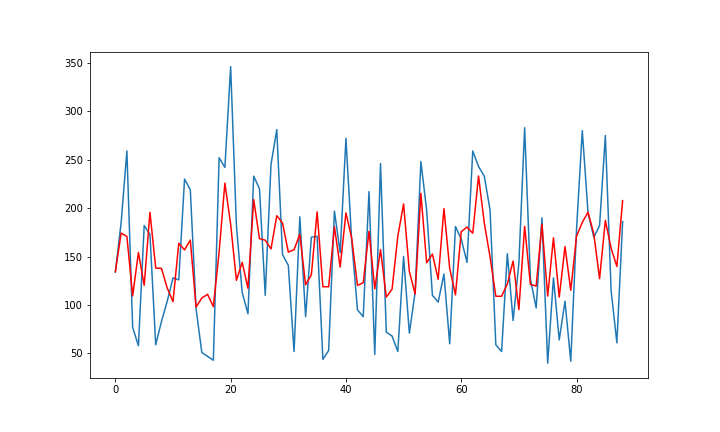

In [38]:
plt.figure(figsize=(10,6))
plt.plot(y_test)
plt.plot(pred_df['average_pred'], c='r')

In [39]:
test_r2_score_ensemble = r2_score(y_test, pred_df['average_pred'])

In [41]:
test_r2_score_ensemble #r2 value got improved using bagging

0.40079380179709934

In [42]:
test_rmse_ensemble = np.sqrt(mean_squared_error(y_test,pred_df['average_pred']))

In [45]:
comparisons = pd.DataFrame(
[['single_model_test',test_rmse_for_single_model,
 test_r2_score_single_model],
['ensemble_model',test_rmse_ensemble,
test_r2_score_ensemble]])

In [46]:
comparisons_columns = ['model type', 'rmse', 'r2']

In [47]:
comparisons

,0,1,2
0,single_model_test,71.657423,0.064859
1,ensemble_model,57.360227,0.400794


## Gradient Boosting

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.plotting import plot_decision_regions

In [50]:
%matplotlib notebook

<IPython.core.display.Javascript object>


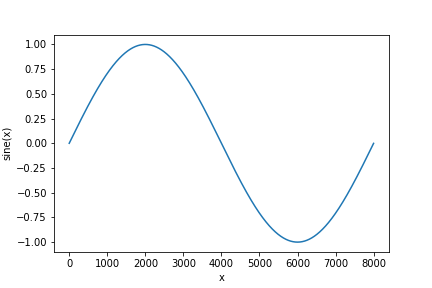

In [53]:
sample_rate = 8000
x = np.arange(sample_rate)
y = np.sin(2*np.pi*x/sample_rate)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('sine(x)')
plt.show()

In [54]:
df = pd.DataFrame(list(zip(x,y)),columns=['x', 'y'])

In [55]:
df.head()

,x,y
0,0,0.000000
1,1,0.000785
2,2,0.001571
3,3,0.002356
4,4,0.003142


<IPython.core.display.Javascript object>


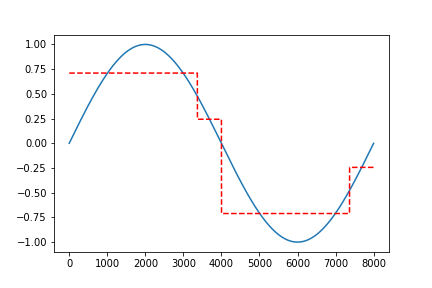

In [63]:
model = DecisionTreeRegressor(max_depth=2)
model.fit(df[['x']], df['y'])
predictions1 = model.predict(df[['x']])
residuals1 = df['y'] - predictions1
plt.plot(df['x'],df['y'])
plt.plot(df['x'], predictions1,'r--')

<IPython.core.display.Javascript object>


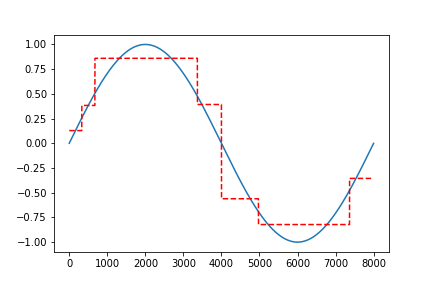

In [64]:
model2 = DecisionTreeRegressor(max_depth=2)
model2.fit(df[['x']], residuals1)
residuals_pred = model2.predict(df[['x']])
predictions2 = predictions1 + residuals_pred
residuals2 = df['y'] - predictions2
plt.plot(df['x'],df['y'])
plt.plot(df['x'], predictions2,'r--')

<IPython.core.display.Javascript object>


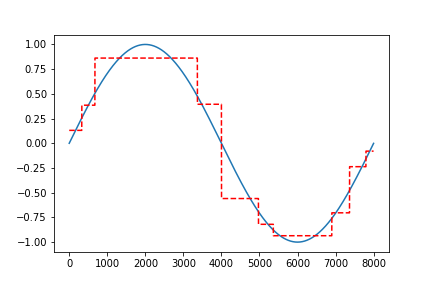

In [65]:
model3 = DecisionTreeRegressor(max_depth=2)
model3.fit(df[['x']], residuals2)
residuals_pred = model3.predict(df[['x']])
predictions3 = predictions2 + residuals_pred
residuals3 = df['y'] - predictions3
plt.plot(df['x'],df['y'])
plt.plot(df['x'], predictions3,'r--')

In [70]:
pred = df['y'].mean()
residuals = df['y'] - pred
prev_pred = pred
predictions_list = []

for i in range(500):
    tree = DecisionTreeRegressor(max_depth = 1)
    X = df[['x']]
    tree.fit(X,residuals)
    residual_predictions = tree.predict(X)
    predictions = prev_pred + residual_predictions
    residuals = y - predictions
    #predictions_list.append(predictions)
    prev_pred = predictions
    

In [71]:
df['predictions'] = predictions #storing final array of predictions

In [72]:
df.head()

,x,y,predictions
0,0,0.000000,0.008637
1,1,0.000785,0.008637
2,2,0.001571,0.008637
3,3,0.002356,0.008637
4,4,0.003142,0.008637


<IPython.core.display.Javascript object>


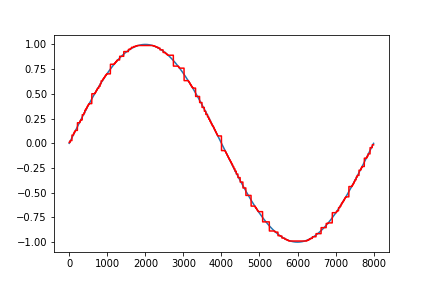

In [74]:
plt.plot(df['x'],df['y'])
plt.plot(df['x'],df['predictions'],'r')